In [19]:
import sys
import pandas as pd
sys.path.append('..')
from ai4mat.data.data import read_structures_descriptions, read_defects_descriptions, StorageResolver

In [15]:
datasets = [f"high_density_defects/{name}_500" for name in ("BP_spin", "GaSe_spin", "hBN_spin", "InSe_spin", "MoS2", "WSe2")] + \
    [f"low_density_defects/{name}" for name in ("MoS2", "WSe2")]

In [48]:
storage_resolver = StorageResolver()
defects = pd.concat([read_structures_descriptions(storage_resolver["csv_cif"].joinpath(dataset)) for dataset in datasets], axis=0)
descriptions = pd.concat([read_defects_descriptions(storage_resolver["csv_cif"].joinpath(dataset)) for dataset in datasets], axis=0).drop(columns="pbc")

In [50]:
for column in ("homo_lumo_gap", "homo", "lumo", "E_1"):
    for kind in ("majority", "minority"):
        defects[f"{column}_{kind}"] = defects[f"{column}_{kind}"].fillna(defects[column])

In [51]:
descriptions.index.rename("descriptor_id", inplace=True)

In [53]:
merged_table = defects.merge(descriptions, how="left", left_on="descriptor_id", right_index=True)

In [66]:
merged_table["defect_count"] = merged_table.defects.apply(len)

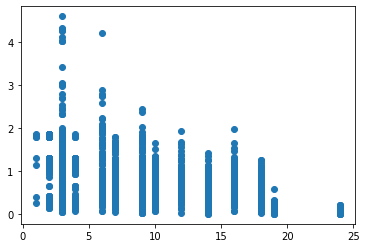

In [80]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(merged_table.defect_count, merged_table.homo_lumo_gap_majority);

In [79]:
merged_table.to_csv("../datasets/others/merged_table_rolos.csv.gz")